## [DE 개발 사전 과제 - 신입](https://www.notion.so/DE-844fea84b1624c9fa459ebdf51a122fd)

### 라이브러리 

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

### 데이터 읽어오기

In [2]:
nov_data = pd.read_csv('./2019-Nov.csv')
nov_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


### 데이터 info

In [3]:
nov_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67501979 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


### 1. 해당 전체 기간에서, KST 기준으로 active user 수가 제일 큰 날짜를 구하세요



In [5]:
nov_data['event_time'] = nov_data["event_time"].replace('UTC', '', regex=True) #KST 변환을 위해 UTC 제거 
nov_data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
3,2019-11-01 00:00:01,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
5,2019-11-01 00:00:01,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c
...,...,...,...,...,...,...,...,...,...
67501972,2019-11-30 23:59:57,view,12301059,2053013556311359947,construction.tools.drill,bosch,266.16,562661595,7165dc28-9cba-40a0-9ed8-76fd909ccb3b
67501975,2019-11-30 23:59:58,view,28719425,2053013565639492569,apparel.shoes,baden,62.81,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359
67501976,2019-11-30 23:59:59,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
67501977,2019-11-30 23:59:59,view,2701706,2053013563911439225,appliances.kitchen.refrigerators,samsung,566.27,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0


In [6]:
format = '%Y-%m-%d %H:%M:%S' 
nov_data['event_time'] = pd.to_datetime(nov_data['event_time'], format=format) # str 형식을 datetime 형식으로 변환

In [7]:
nov_data['event_time'] = nov_data['event_time'] + datetime.timedelta(hours=9) #UTC KST 변환

In [8]:
user_count  = nov_data['event_time'].dt.strftime('%Y-%m-%d').value_counts() #날짜별 active user user 
bigDate = user_count.index[0] #날짜별 active user user 중 가장큰  날짜
bigDate

'2019-11-17'

### 2. 1의 날짜에서, 세션이 가장 긴 사용자 10명에 대해 "user_id, session_id, 세션시간"를 구하세요
- groupby 사용해서 수정

In [9]:
bigDate_list = nov_data[nov_data['event_time'].dt.strftime('%Y-%m-%d') ==bigDate ] # 전체 데이터중 1의 날짜에 해당하는 데이터만 추출 

In [10]:
user_id_list = list(set(bigDate_list['user_id'])) # user_id 중복 제거 

In [11]:
session_time = []
userId = []
session_id = []
for user_id in user_id_list:
  session_cal = bigDate_list[bigDate_list['user_id']==user_id]
  userId.append(session_cal['user_id'].values[0]) # 같은 값 이므로 첫번째 값을 대입  
  session_id.append(session_cal['user_session'].values[0])
  session_time.append(max(session_cal['event_time'])-min(session_cal['event_time']))

long_session_user = pd.DataFrame({'user_id':userId,'session_id':session_id,'sesssion_time':session_time})

In [12]:
long_session_user = long_session_user.sort_values(by=['sesssion_time'], axis=0,ascending=False)[0:10].reset_index(drop=True)
long_session_user

,user_id,session_id,sesssion_time
0,536072091,16fa601b-2e32-43ac-a0d2-60047e26853f,0 days 23:59:40
1,515294646,1d9ccd34-1253-45dc-ba46-4dc262354918,0 days 23:59:14
2,521980816,ef27ad91-0c07-4eb5-83a1-606777f19d8e,0 days 23:59:11
3,515771922,25f8117a-f23e-43e9-8ba4-522a186b178f,0 days 23:59:08
4,522472133,a6152fc8-2999-46a9-be47-f873a9ff90fc,0 days 23:59:07
5,513794814,e82383d6-0ba5-4787-83da-2e0454efbd15,0 days 23:59:07
6,515396681,536f23a4-4789-4522-800b-cd1f884feaa4,0 days 23:59:06
7,514277767,1a844962-705d-4bdc-ad00-69495a36a15c,0 days 23:59:05
8,536580231,b50f4571-71fb-4535-b0b0-f70d20328463,0 days 23:59:02
9,512942880,b47f129e-d9d7-48e7-b038-a8a018e401c9,0 days 23:59:02


### 3. 1의 날짜의 15분단위로 active user 수를 구하세요


In [13]:
bigDate_list.resample('15T', on='event_time').user_id.count()

event_time
2019-11-17 00:00:00    49379
2019-11-17 00:15:00    45030
2019-11-17 00:30:00    47724
2019-11-17 00:45:00    55415
2019-11-17 01:00:00    52098
                       ...  
2019-11-17 22:45:00    73962
2019-11-17 23:00:00    72523
2019-11-17 23:15:00    73616
2019-11-17 23:30:00    75803
2019-11-17 23:45:00    76207
Freq: 15T, Name: user_id, Length: 96, dtype: int64

### 4. 1의 날짜에서 view → cart → purchase 이벤트 진행에 따른 funnel 수치를 구하세요

- view,  cart, purchase 3개의 구간으로 구분을 해준다

In [14]:
funnel_dict = {'view':1,'cart':2,'purchase':3}
funnel_steps = pd.DataFrame.from_dict(funnel_dict,orient='index',columns=['step_no'])
funnel_steps
#|bigDate_list[bigDate_list['user_id']==557746614]

,step_no
view,1
cart,2
purchase,3


In [15]:
grouped = bigDate_list.groupby(['user_session','event_type'])['event_time'].agg(np.min) ##
grouped = pd.DataFrame(grouped).merge(funnel_steps,left_on='event_type',right_index=True)
grouped

,,event_time,step_no
user_session,event_type,,
00000616-f016-4c01-b323-438486d9d3ee,view,2019-11-17 14:36:28,1
00002e0a-8b74-4c72-bb5a-99e04fa264da,view,2019-11-17 17:22:06,1
00004c44-9765-4216-aafd-0ede55aad240,view,2019-11-17 23:00:14,1
00005114-2d52-4a59-ac08-ec71bbaf24db,view,2019-11-17 22:28:30,1
00006a96-5e74-427a-97f9-5d9cdf4a2de1,view,2019-11-17 21:59:41,1
...,...,...,...
fffa719c-33d7-4e9b-975d-b952768f6db4,purchase,2019-11-17 23:53:01,3
fffb1d5d-2b83-4016-8d2b-896514ab3c84,purchase,2019-11-17 20:11:38,3
fffd5e32-830d-4758-be7d-b9d121556a18,purchase,2019-11-17 15:48:39,3


In [16]:
funnel = grouped.reset_index().pivot(index='user_session',columns='step_no',values='event_time')
funnel

step_no,1,2,3
user_session,,,
00000616-f016-4c01-b323-438486d9d3ee,2019-11-17 14:36:28,NaT,NaT
00002e0a-8b74-4c72-bb5a-99e04fa264da,2019-11-17 17:22:06,NaT,NaT
00004c44-9765-4216-aafd-0ede55aad240,2019-11-17 23:00:14,NaT,NaT
00005114-2d52-4a59-ac08-ec71bbaf24db,2019-11-17 22:28:30,2019-11-17 22:31:26,NaT
00006a96-5e74-427a-97f9-5d9cdf4a2de1,2019-11-17 21:59:41,NaT,NaT
...,...,...,...
ffffbf33-ea0f-4f96-8908-226feafaf7d3,2019-11-17 23:25:03,2019-11-17 23:25:17,NaT
ffffd424-f747-4a57-aaee-0735b4e2c291,2019-11-17 12:40:39,NaT,NaT
ffffee94-7d46-454c-b12b-19e6f78fa18b,2019-11-17 17:12:53,NaT,NaT


In [17]:
funnel.columns = funnel_steps.index
funnel

,view,cart,purchase
user_session,,,
00000616-f016-4c01-b323-438486d9d3ee,2019-11-17 14:36:28,NaT,NaT
00002e0a-8b74-4c72-bb5a-99e04fa264da,2019-11-17 17:22:06,NaT,NaT
00004c44-9765-4216-aafd-0ede55aad240,2019-11-17 23:00:14,NaT,NaT
00005114-2d52-4a59-ac08-ec71bbaf24db,2019-11-17 22:28:30,2019-11-17 22:31:26,NaT
00006a96-5e74-427a-97f9-5d9cdf4a2de1,2019-11-17 21:59:41,NaT,NaT
...,...,...,...
ffffbf33-ea0f-4f96-8908-226feafaf7d3,2019-11-17 23:25:03,2019-11-17 23:25:17,NaT
ffffd424-f747-4a57-aaee-0735b4e2c291,2019-11-17 12:40:39,NaT,NaT
ffffee94-7d46-454c-b12b-19e6f78fa18b,2019-11-17 17:12:53,NaT,NaT


In [18]:
step_values = [funnel[column].notnull().sum() for column in funnel.columns]
step_values

[734771, 168761, 89106]

In [19]:
funnel.columns

Index(['view', 'cart', 'purchase'], dtype='object')

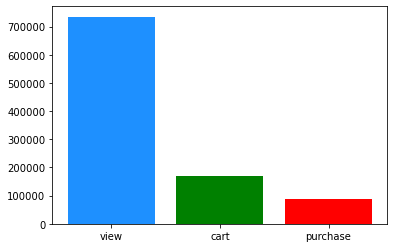

In [20]:
x = np.arange(3)
years = funnel.columns
values = step_values
colors = ['dodgerblue', 'g', 'r']

plt.bar(x, values, color=colors)
plt.xticks(x, years)

plt.show()

In [21]:
np.mean(funnel['cart']-funnel['view'])

Timedelta('0 days 00:06:02.372699644')

In [22]:
np.mean(funnel['purchase']-funnel['cart'])

Timedelta('0 days 00:03:36.733518417')